In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

In [3]:
'''
this is the orginal function / distribution from where we are getting y values given x value
this function linear regression have to approximate

'''
def linear_func(x):
    
    noise = 0.4
    t =  1.25*x
    y = t + np.random.uniform(-noise,noise,len(x))
    return y

'''
This function is responsible for generating random samples given X and y values
'''
def generate_random_subset(ratio,x,y):
    
    nsamples = int(np.round(len(x)*ratio))
    ind = random.sample(range(len(x)),nsamples)
    ind = np.sort(ind)
    x_subset = x[ind]
    y_subset = y[ind]
    return x_subset, y_subset

In [4]:
#generating original data
x = np.arange(1,1000,0.2).reshape(-1,1)
y_orig = linear_func(x)

In [5]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y_orig,test_size=0.3)

In [21]:
data_pct = [0.3,0.45,0.55,0.65,0.8]
num_trails = 25
variances = []
biases = []
for pct in data_pct:
    
    models = []
    y_pred = [0]*len(x)
    var = [0]*len(x)
    
    for j in range(num_trails):
        
        #drawing out samples from respective percentage of data given in pct
        x_sub,y_sub = generate_random_subset(pct,X_train,y_train)
        
        #fitting the model, one caveat is there I have not coded how well training has been done by using validation dataset
        #this is something you need to do when working on actual problem.
        #you can either you standard lib or train your custome model using gradient descent / SGD
        lr = LinearRegression().fit(x_sub, y_sub)
        
        #saving the model for later use 
        models.append(lr)
        
        #predicting the values for X_test
        y_pred = y_pred + lr.predict(X_test)
        
    #taking avg prediction for each test point
    y_pred = y_pred / num_trails
    
    #calculating biases just for fun
    bias = np.linalg.norm(y_pred-y_test)
    biases.append(bias)
    
    for j in range(num_trails):
        p_t = models.pop(0)
        #for each test point cal (prediction - avg_prediction) ** 2
        var = var + np.square(p_t.predict(X_test) - y_pred)
    
    #normalize the value for each test data point
    var = var/num_trails
    
    #compute the variance of the for entire test dataset now
    variance = np.linalg.norm(var)
    variances.append(variance)
    
print('Completed')

Completed


In [22]:
#We can see their is not much of the difference between 30% and 60% var cal but the actual variance is close to 90% population
#We can achieve this estimates variance with 60% data as well if we increase the number of trails to perform experiment on
print('Variance ',variances)
print('Biases ',biases)

Variance  [6.1871769469736e-22, 4.273314635525822e-22, 1.0766929833718506e-21, 7.639705212402013e-22, 4.631011178766113e-22]
Biases  [2.1205030001489716e-08, 4.048552649771647e-08, 3.775059284148685e-08, 4.8567166146911096e-08, 6.936738233828848e-08]


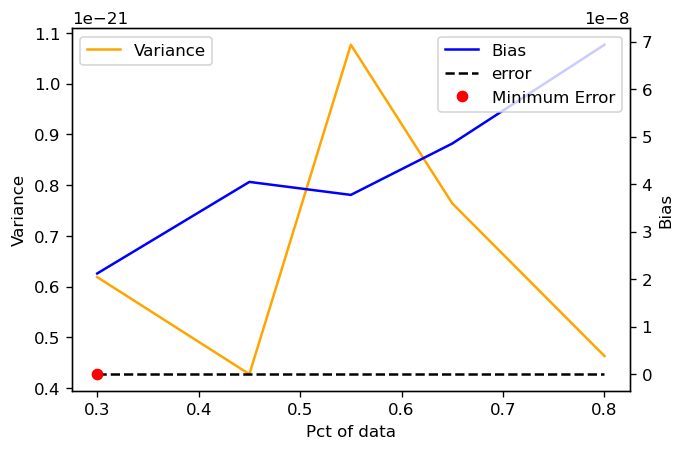

In [23]:
fig, ax1 = plt.subplots(dpi=120)

ax1.set_xlabel('Pct of data')
ax1.set_ylabel('Variance')
ax1.plot(data_pct,variances,color='orange',label = 'Variance')

ax2 = ax1.twinx()

ax2.set_ylabel('Bias')
ax2.plot(data_pct, biases,color='blue',label = 'Bias')

error = np.square(biases)+variances
min_ind = np.argmin(error)
plt.plot(data_pct, error, 'k--', label = 'error')
plt.plot(data_pct[min_ind], error[min_ind], 'ro', label= 'Minimum Error')
leg = ax2.legend(loc='upper right')
leg = ax1.legend(loc='upper left')
plt.show()

In [26]:
'''
Findings as we can see, when data pct is less, model has been underfit so variances tends to be low
On the other hand, biases tends to be high as we give more data biases will reduce but variance will shoot up.
So we need to find, the sweet spot such that error is minimized.
Error seems to be flat line but it's not. Why? the error magnitude is not matching the variance and biases scale
'''

"\nFindings as we can see, when data pct is less, model has been underfit so variances tends to be low\nOn the other hand, biases tends to be high as we give more data biases will reduce but variance will shoot up.\nSo we need to find, the sweet spot such that error is minimized.\nError seems to be flat line but it's not. Why? the error magnitude is not matching the variance and biases scale\n"